In [1]:
from pymongo import MongoClient
import matplotlib.pyplot as plt
import os
from sshtunnel import SSHTunnelForwarder
import numpy as np
import pandas as pd

In [2]:
MONGO_HOST = "193.196.55.231"
MONGO_DB = "twitter_db"
MONGO_USER = "LOGIN"
MONGO_PASS = "PASSWORD"

server = SSHTunnelForwarder(
    MONGO_HOST,
    ssh_username="ubuntu",
    ssh_pkey="/home/tobias/.ssh/ghost_id_rsa",
    remote_bind_address=('127.0.0.1', 27017)
)

server.start()

client = MongoClient('127.0.0.1', server.local_bind_port) # server.local_bind_port is assigned local port
db = client[MONGO_DB]


In [4]:
data = client["twitter_db"].cc_tweets.find({}, {"text": 1, "seed" : 1})

In [73]:
all = []
for ele in data:
    if "followers_crawled" in ele:
        if "public_metrics" in ele:
            metrics = ele["public_metrics"]
            all.append(metrics)

In [6]:
len(data)

TypeError: object of type 'Cursor' has no len()

In [7]:
df_data = pd.DataFrame(list(data))

In [8]:
df_data

,_id,text,seed
0,61e70f151d4d4f3c2be3ac11,https://t.co/yJnnKVjume,1327806477923323904
1,61e70f171d4d4f3c2be3ac12,@bonesbord @ginacarano People die all the time...,1327806477923323904
2,61e70f171d4d4f3c2be3ac13,@ginacarano Don't let them get you down. The D...,1327806477923323904
3,61e70f171d4d4f3c2be3ac14,@ginacarano @HaroldBunch5 Except that's a lie....,1327806477923323904
4,61e70f171d4d4f3c2be3ac15,@E_Husky @hdgators @ginacarano @disneyplus @Di...,1327806477923323904
...,...,...,...
550082,61eaaa8672d9a4ec1ce79ec4,Also... https://t.co/GCrUOJR8zj,
550083,61eaaa8672d9a4ec1ce79ec5,"Yeah, that thing. https://t.co/1CrCmjSSUx",
550084,61eaaa8672d9a4ec1ce79ec6,Does this dude seriously understand that White...,
550085,61eaaa8672d9a4ec1ce79ec7,@dropoutnation @haralduhlig @TrevonDLogan @Cla...,


In [12]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/tobias/nltk_data...


True

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
import operator
sia = SentimentIntensityAnalyzer()


In [15]:
df_data["sentiment_score"] = df_data["text"].apply(lambda x: sia.polarity_scores(x)["compound"])
df_data["sentiment"] = np.select([df_data["sentiment_score"] < 0, df_data["sentiment_score"] == 0, df_data["sentiment_score"] > 0],
                           ['neg', 'neu', 'pos'])

In [28]:
df_data

,_id,text,seed,sentiment_score,sentiment
0,61e70f151d4d4f3c2be3ac11,https://t.co/yJnnKVjume,1327806477923323904,0.0000,neu
1,61e70f171d4d4f3c2be3ac12,@bonesbord @ginacarano People die all the time...,1327806477923323904,-0.8793,neg
2,61e70f171d4d4f3c2be3ac13,@ginacarano Don't let them get you down. The D...,1327806477923323904,-0.0516,neg
3,61e70f171d4d4f3c2be3ac14,@ginacarano @HaroldBunch5 Except that's a lie....,1327806477923323904,0.0000,neu
4,61e70f171d4d4f3c2be3ac15,@E_Husky @hdgators @ginacarano @disneyplus @Di...,1327806477923323904,0.2550,pos
...,...,...,...,...,...
550082,61eaaa8672d9a4ec1ce79ec4,Also... https://t.co/GCrUOJR8zj,,0.0000,neu
550083,61eaaa8672d9a4ec1ce79ec5,"Yeah, that thing. https://t.co/1CrCmjSSUx",,0.2960,pos
550084,61eaaa8672d9a4ec1ce79ec6,Does this dude seriously understand that White...,,0.2023,pos
550085,61eaaa8672d9a4ec1ce79ec7,@dropoutnation @haralduhlig @TrevonDLogan @Cla...,,-0.6412,neg


In [37]:
import os
print(os.getcwd())

/home/tobias/Projects/MasterProject/cancel-culture-crawler/analyzer


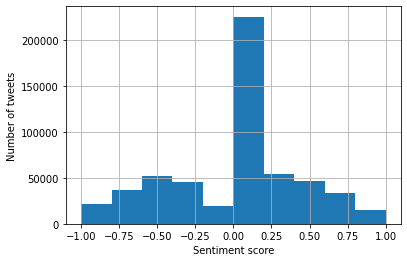

In [48]:
ax = df_data["sentiment_score"].hist()  # s is an instance of Series
ax.set_xlabel("Sentiment score")
ax.set_ylabel("Number of tweets")
fig.suptitle("Histogram of tweets per sentiment score") 
fig = ax.get_figure()
fig.savefig('sentiment2.png', dpi=500)


In [76]:
df_data.apply(pd.value_counts)

,tweet_count
6,22
1,22
5,21
3,19
7,15
...,...
7098,1
9145,1
949,1
5043,1


In [64]:
gb = df_data.groupby('tweet_count')

In [65]:
for el in gb:
    print(el)
    break

(1,         tweet_count
113               1
168               1
606               1
942               1
977               1
...             ...
129466            1
129652            1
129889            1
130379            1
133967            1

[222 rows x 1 columns])


In [61]:
np.min(df_data)

tweet_count    1
dtype: int64

In [38]:
data = client["twitter_db_DE"].cc_tweets.find({}, {"seed": 1})
df = pd.DataFrame(list(data))
df

,_id,seed
0,61e70f151d4d4f3c2be3ac11,1327806477923323904
1,61e70f171d4d4f3c2be3ac12,1327806477923323904
2,61e70f171d4d4f3c2be3ac13,1327806477923323904
3,61e70f171d4d4f3c2be3ac14,1327806477923323904
4,61e70f171d4d4f3c2be3ac15,1327806477923323904
...,...,...
550082,61eaaa8672d9a4ec1ce79ec4,
550083,61eaaa8672d9a4ec1ce79ec5,
550084,61eaaa8672d9a4ec1ce79ec6,
550085,61eaaa8672d9a4ec1ce79ec7,


In [122]:
db = client["twitter_db"]
data = db.cc_users.find({}, {"public_metrics.tweet_count": 1})


In [123]:
counts2 = []
for el in data:
    if "public_metrics" in el:
        counts2.append(el["public_metrics"]["tweet_count"])

In [127]:
lll = [*counts, *counts2]

In [134]:
np.sum(lll)

3134359285

In [140]:
print(sum(sorted(lll, reverse=True)[:1000]))

359952839


In [39]:
lde = df.groupby(['seed']).size()
lde

seed
                        16650
1265998625836019712      3710
1269382518362509313    192076
1269389298664701952    323254
1327806477923323904     14397
dtype: int64

In [40]:
for el in lde:
    cleaned.append(el)

In [34]:
l = df.groupby(['seed']).size()

In [35]:
print(l)

seed
1148654208398319622     8082
1466829037645582341    14066
dtype: int64


In [36]:
cleaned = list(l)

In [41]:
cleaned

[8082, 14066, 16650, 3710, 192076, 323254, 14397]

In [42]:
np.median(cleaned)

14397.0

In [62]:
users = [0, 66903, 14000000, 14000000, 985121, 85892, 58165]

In [63]:
d = {}
for i, el in enumerate(cleaned):
    d[el] = users[i]

In [64]:
print(d)

{16650: 0, 3710: 66903, 192076: 14000000, 323254: 14000000, 14397: 985121, 8082: 85892, 14066: 58165}


In [67]:
del d[16650]
d

{3710: 66903,
 192076: 14000000,
 323254: 14000000,
 14397: 985121,
 8082: 85892,
 14066: 58165}

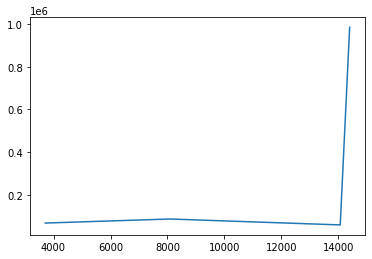

In [92]:
lists = sorted(d.items()) 
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x[:-2], y[:-2])
plt.show()


In [85]:
from sklearn import preprocessing
print(x)
print(y)
normalized = preprocessing.normalize([x])
normalized2 = preprocessing.normalize([y])

(3710, 8082, 14066, 14397, 192076, 323254)
(66903, 85892, 58165, 985121, 14000000, 14000000)


In [88]:
print(normalized2)

[[0.00337487 0.00433276 0.00293409 0.04969369 0.70621943 0.70621943]]


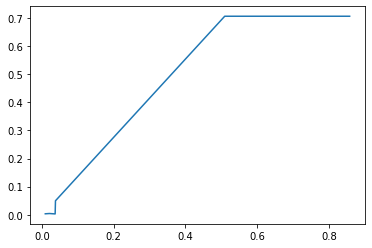

In [90]:
plt.plot(normalized[0], normalized2[0])